# Redes convolucionales: primer ejemplo

### Preparación de datos

Cargamos los datos a un dataframe de pandas

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_rows = 10

df_train = pd.read_csv('zip_train.csv', sep=',')
df_test = pd.read_csv('zip_test.csv', sep=',')
print df_train.shape
print df_test.shape
df_train

(7291, 257)
(2007, 257)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257
0,6,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1
1,5,-1,-1,-1,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1
2,4,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1
3,7,-1,-1,-1,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1
4,3,-1,-1,-1,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,3,-1,-1,-1,-0.988,-0.527,-0.208,0.620,1.000,0.467,...,-0.116,0.899,0.416,-0.510,-1.000,-1.000,-1.000,-1.000,-1.000,-1
7287,3,-1,-1,-1,-0.990,0.708,0.557,0.347,-0.107,-0.758,...,0.697,0.636,0.167,-0.968,-1.000,-1.000,-1.000,-1.000,-1.000,-1
7288,3,-1,-1,-1,-0.783,-0.984,-0.827,0.068,1.000,1.000,...,0.805,1.000,1.000,0.727,-0.342,-0.933,-1.000,-1.000,-1.000,-1
7289,0,-1,-1,-1,-1.000,-1.000,-0.549,0.463,0.999,0.999,...,-0.231,0.621,0.999,-0.042,-0.231,-0.687,-1.000,-1.000,-1.000,-1


In [128]:
x_train_1 = np.float32(df_train.iloc[:,1:257].values)
x_test_1 = np.float32(df_test.iloc[:,1:257].values)
y_train = np.int32(df_train['X1'])
y_test = np.int32(df_test['X1'])

print x_train_1.shape
print x_train_1
print y_train


(7291, 256)
[[-1.         -1.         -1.         ..., -1.         -1.         -1.        ]
 [-1.         -1.         -1.         ..., -0.671      -0.82800001 -1.        ]
 [-1.         -1.         -1.         ..., -1.         -1.         -1.        ]
 ..., 
 [-1.         -1.         -1.         ..., -1.         -1.         -1.        ]
 [-1.         -1.         -1.         ..., -1.         -1.         -1.        ]
 [-1.         -1.         -1.         ..., -1.         -1.         -1.        ]]
[6 5 4 ..., 3 0 1]


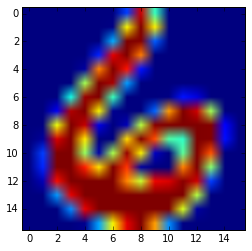

6


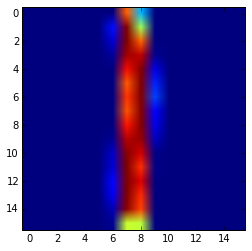

1


In [329]:
%matplotlib inline
plt.imshow(x_train_1[0,].reshape(16,16))
plt.show()
print y_train[0]
plt.imshow(x_train_1[12,].reshape(16,16))
plt.show()
print y_train[12]

In [330]:
x_train = x_train_1.reshape(x_train_1.shape[0], 1, 16, 16)
x_test = x_test_1.reshape(x_test_1.shape[0], 1, 16, 16)
x_train[5][0].shape
x_train[5][0]

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -0.39700001,  0.98299998, -0.53500003, -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
         0.69199997,  0.53600001, -0.76700002, -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -0.921     ,
         0.92799997, -0.118     , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -0.39399999,
         1.        , -0.59600002, -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        ],
       [-1.        , -1.        , -1

Necesitamos una función para iterar sobre los datos en mini-lotes

In [131]:
def iterar_minilotes(entradas, respuesta, n_lote, mezclar):
    if mezclar:
        indices = np.arange(len(entradas))
        np.random.shuffle(indices)
    for i in range(0, len(entradas) - n_lote + 1, n_lote):
        if mezclar:
            parte = indices[i:i + n_lote]
        else:
            parte = slice(i, i + n_lote)
        yield entradas[parte], respuesta[parte]

In [132]:
for a,b in iterar_minilotes(x_train, y_train, 6, mezclar = True):
    print b


[2 2 0 0 6 2]
[8 0 7 8 2 6]
[0 4 0 8 5 4]
[0 0 3 8 8 8]
[3 3 5 2 7 2]
[8 2 6 6 7 9]
[4 6 1 0 0 7]
[0 2 4 2 4 7]
[4 1 2 1 2 0]
[2 5 2 1 9 7]
[4 0 0 4 9 9]
[5 4 0 9 6 9]
[5 5 5 0 7 3]
[6 4 3 7 2 5]
[1 0 8 3 1 4]
[1 0 6 3 5 0]
[6 0 0 4 0 8]
[8 0 4 4 1 6]
[7 1 3 5 9 6]
[2 0 5 1 4 2]
[8 2 2 7 1 8]
[0 1 6 0 3 5]
[2 6 5 6 7 9]
[6 6 2 5 6 4]
[4 1 2 8 5 0]
[5 7 2 6 7 7]
[5 1 3 3 2 7]
[5 4 1 0 3 7]
[7 2 1 9 7 4]
[5 6 1 9 0 8]
[4 7 1 8 2 5]
[3 6 7 2 9 5]
[5 8 8 6 2 9]
[8 0 0 2 1 7]
[7 2 0 1 8 4]
[2 0 1 4 5 4]
[8 6 6 6 9 1]
[1 1 2 2 8 7]
[3 3 0 0 0 1]
[0 7 9 3 8 2]
[1 3 7 6 3 2]
[7 4 7 0 1 0]
[1 2 0 4 8 0]
[1 4 3 1 6 3]
[6 4 0 0 1 8]
[8 7 6 1 6 7]
[4 0 5 8 7 0]
[1 5 0 3 0 0]
[2 0 1 9 8 3]
[5 1 0 1 5 9]
[0 9 8 3 8 1]
[8 3 2 0 6 2]
[4 2 0 0 3 8]
[1 2 3 0 2 3]
[7 2 8 2 0 4]
[6 5 2 1 0 6]
[4 7 1 1 1 2]
[1 9 5 1 6 8]
[2 2 6 8 0 2]
[4 2 4 1 1 2]
[7 5 4 9 9 0]
[1 9 3 4 7 2]
[9 1 3 1 5 7]
[8 9 8 1 2 4]
[0 5 9 2 6 0]
[6 4 0 1 3 0]
[5 0 0 7 3 7]
[2 2 8 0 1 4]
[3 5 0 1 6 8]
[9 2 5 9 2 9]
[1 7 3 8 2 6]
[4 9 2

Ejemplo

In [189]:
import lasagne
from lasagne import layers
from lasagne.nonlinearities import  softmax, rectify
import theano
import theano.tensor as T
from lasagne.regularization import regularize_layer_params_weighted, l2, l1

Empezamos cargando los datos

In [368]:
im_ancho = 16
im_alto = 16
n_lote = 200

Definimos ahora la arquitectura de la red:

In [468]:
input_var = T.tensor4('entradas')
target_var = T.ivector('respuesta')

capa_entrada = layers.InputLayer((n_lote, 1, im_ancho, im_alto), input_var)
capa_conv_1 = layers.Conv2DLayer(
    capa_entrada,
    num_filters = 20,
    filter_size = (5,5),
    nonlinearity = rectify)
capa_pool_1 = layers.MaxPool2DLayer(
    capa_conv_1,
    pool_size = (2,2)
)
capa_conv_2 = layers.Conv2DLayer(
    capa_pool_1,
    num_filters = 20,
    filter_size = (5,5),
    nonlinearity = rectify
)
capa_pool_2 = layers.MaxPool2DLayer(
    capa_conv_1,
    pool_size = (2,2)
)
capa_oculta = layers.DenseLayer(
    capa_pool_2,
    num_units = 20,
    nonlinearity = rectify
)
capa_salida = layers.DenseLayer(
    capa_oculta,
    num_units = 10,
    nonlinearity = softmax
)

In [469]:
#preparación

print capa_salida
print layers

<module 'lasagne.layers' from '/Users/felipegonzalez/Library/Python/2.7/lib/python/site-packages/lasagne/layers/__init__.pyc'>


In [470]:
prediction = lasagne.layers.get_output(capa_salida)
loss = lasagne.objectives.categorical_crossentropy(prediction, target_var)
loss = loss.mean()
reg_layers = {capa_oculta: 0.01, capa_conv_1:0.001, capa_conv_2:0.001, capa_salida:0.01}
l2_penalty = regularize_layer_params_weighted(reg_layers, l2)
loss = loss + l2_penalty

In [471]:
params =lasagne.layers.get_all_params(capa_salida, trainable = True)

In [472]:
updates = lasagne.updates.sgd(
        loss, params, learning_rate=0.001)

In [473]:
test_prediction = lasagne.layers.get_output(capa_salida, deterministic=True)
test_loss = lasagne.objectives.categorical_crossentropy(test_prediction,
                                                        target_var)
test_loss = test_loss.mean()
test_acc = T.mean(T.eq(T.argmax(test_prediction, axis=1), target_var))

In [474]:
train_fn = theano.function([input_var, target_var], loss, updates=updates)


In [475]:
val_fn = theano.function([input_var, target_var], [test_loss, test_acc])


In [ ]:
num_epochs = 1000
for epoch in range(num_epochs):
    train_err = 0
    train_batches = 0
    start_time = time.time()
    for batch in iterar_minilotes(x_train, y_train, n_lote, mezclar = True):
        inputs, targets = batch
        train_err += train_fn(inputs, targets)
        train_batches += 1
    # And a full pass over the validation data:
    val_err = 0
    val_acc = 0
    val_batches = 0
    for batch in iterar_minilotes(x_test, y_test, n_lote, mezclar=False):
        inputs, targets = batch
        err, acc = val_fn(inputs, targets)
        val_err += err
        val_acc += acc
        val_batches += 1

    # Then we print the results for this epoch:
    if(epoch % 50 == 0):
        print("Epoch {} of {} took {:.3f}s".format(
            epoch + 1, num_epochs, time.time() - start_time))
        print("  training loss:\t\t{:.6f}".format(train_err / train_batches))
        print("  validation loss:\t\t{:.6f}".format(val_err / val_batches))
        print("  validation accuracy:\t\t{:.2f} %".format(
            val_acc / val_batches * 100))


In [ ]:
test_prediction = lasagne.layers.get_output(capa_salida, deterministic=True)
predict_fn = theano.function([input_var], T.argmax(test_prediction, axis=1))
 

In [ ]:
preds = predict_fn(x_test)
print preds

In [ ]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(y_test, preds)
np.mean(y_test==preds)